In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("vetclinic_dataset.csv", sep=";", encoding="utf-8")
df

,Порода,Количество по базе,Уролитиаз/МКБ,Энетропатии и гастропатии (в том числе инфекционные),Панкреатит,Гепатопатии,ХБП,Сахарный диабет,Ожирение,Переведенное название,Size,group,Название из данных,Группа из данных
0,Йоркширские терьеры,571,18,111,63,4,13,4,12,Yorkshire Terriers,small,toy,Yorkshire Terrier,1.0
1,Немецкая овчарка,715,3,186,4,1,5,3,3,German Shepherd Dog,large,pastoral,German Shepherd Dog,0.4
2,Тойтерьер,362,7,55,25,1,4,2,12,Toy Terrier,small,toy,-,-
3,Чихуахуа,227,3,36,23,0,0,0,10,Chihuahua,small,toy,Chihuahua,Toy Group
4,Шпиц немецкий,107,3,14,5,0,0,0,2,German Spitz,small,utility,German Spitz,Foundation Stock Service
5,Шпиц померанский,103,2,23,6,0,0,0,2,Pomeranian Spitz,small,toy,Pomeranian,Toy Group
6,Алабай,194,1,45,2,1,1,0,0,Alabai,large,foundation stock service,Central Asian Shepherd Dog,Foundation Stock Service
7,Хаски,208,3,38,3,0,4,1,1,Husky,medium-large,working,Siberian Husky,Working Group
8,Мопс,201,14,20,5,0,0,0,14,Pug,small,toy,Pug,Toy Group
9,Французский бульдог,197,0,24,5,0,0,0,1,French Bulldog,small,utility,French Bulldog,Non-Sporting Group


In [23]:
# Find top 5 breeds by "Количество по базе" (popularity)
top_counts = df[['Порода', 'Количество по базе']].sort_values("Количество по базе", ascending=False).head(10)
top_counts

,Порода,Количество по базе
1,Немецкая овчарка,715
0,Йоркширские терьеры,571
2,Тойтерьер,362
22,Лабрадор,275
3,Чихуахуа,227
7,Хаски,208
8,Мопс,201
9,Французский бульдог,197
6,Алабай,194
10,Пекинес,159


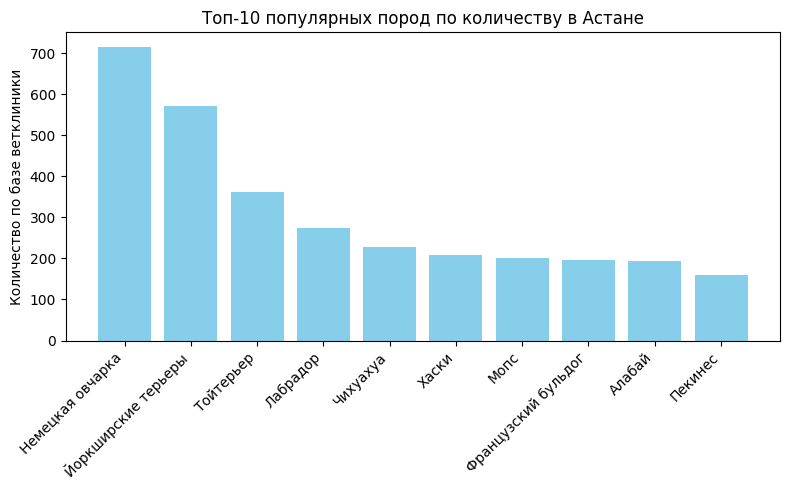

In [22]:
# Plotting the counts for top 5 breeds
plt.figure(figsize=(8, 5))
plt.bar(top_counts["Порода"], top_counts["Количество по базе"], color='skyblue')
plt.ylabel("Количество по базе ветклиники")
plt.title("Топ-10 популярных пород по количеству в Астане")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# Define the disease columns
disease_cols = [
    "Уролитиаз/МКБ", 
    "Энтеропатия и гастропатия", 
    "Панкреатит", 
    "Гепатопатии", 
    "ХБП", 
    "Сахарный диабет", 
    "Ожирение"
]

# Sum each disease across all breeds
disease_totals = df[disease_cols].sum().sort_values(ascending=False)

# Convert to DataFrame for display
disease_df = disease_totals.reset_index()
disease_df.columns = ['Disease', 'Total Cases']